<a href="https://colab.research.google.com/github/Remonah-3/Github_Assignment/blob/master/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Iteration 0: Support vectors = 24
Iteration 10: Support vectors = 8
Iteration 20: Support vectors = 4
Iteration 30: Support vectors = 4
Iteration 40: Support vectors = 3
Iteration 50: Support vectors = 3
Iteration 60: Support vectors = 3
Iteration 70: Support vectors = 3
Iteration 80: Support vectors = 3
Iteration 90: Support vectors = 3

Scratch Linear SVM Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0

scikit-learn Linear SVM Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0


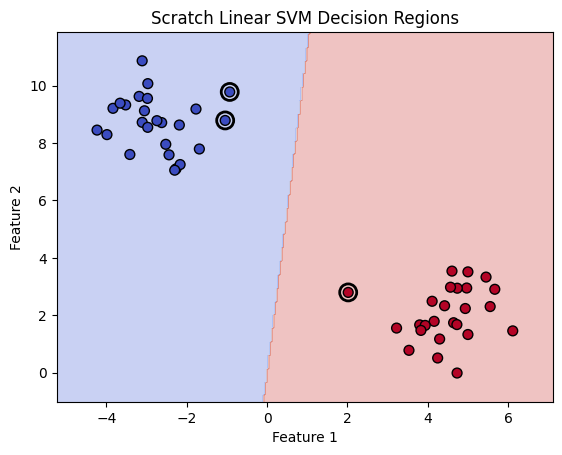

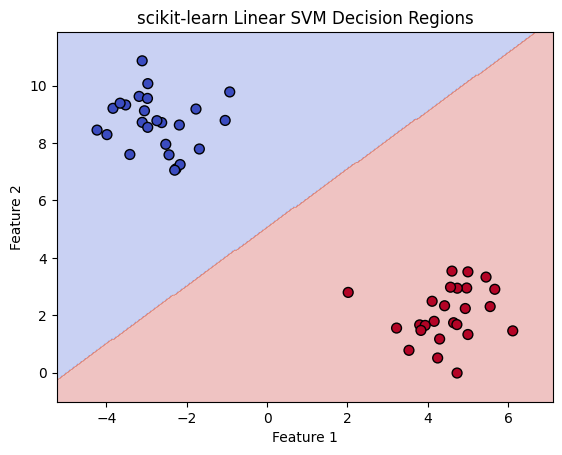

Iteration 0: Support vectors = 100
Iteration 10: Support vectors = 99
Iteration 20: Support vectors = 91
Iteration 30: Support vectors = 84
Iteration 40: Support vectors = 80
Iteration 50: Support vectors = 78
Iteration 60: Support vectors = 69
Iteration 70: Support vectors = 64
Iteration 80: Support vectors = 61
Iteration 90: Support vectors = 58

Scratch Polynomial SVM Accuracy: 1.0
scikit-learn Polynomial SVM Accuracy: 1.0


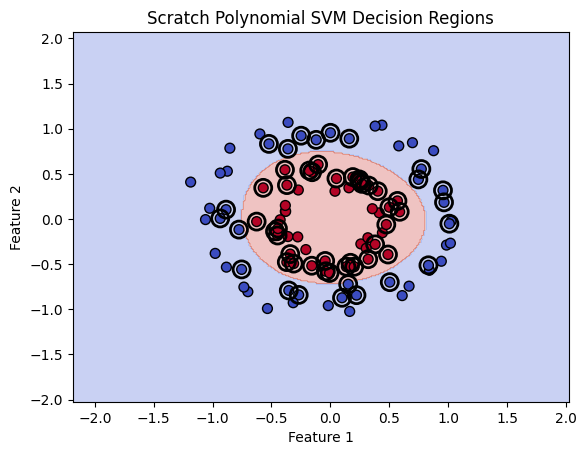

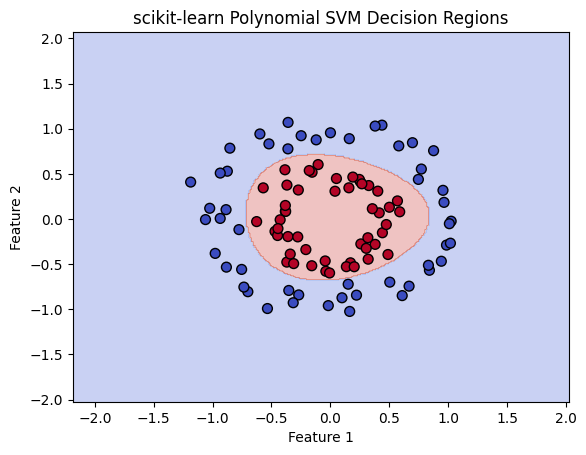

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_circles
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Scratch SVM Class (Linear/Polynomial)

class ScratchSVMClassifier:
    def __init__(self, num_iter=100, lr=0.01, kernel='linear', degree=2, gamma=1, theta=0, threshold=1e-5, verbose=False):
        self.num_iter = num_iter
        self.lr = lr
        self.kernel_type = kernel
        self.degree = degree
        self.gamma = gamma
        self.theta = theta
        self.threshold = threshold
        self.verbose = verbose

        # Support vector info
        self.lam_sv = None
        self.X_sv = None
        self.y_sv = None

    # Kernel function
    def kernel(self, x1, x2):
        if self.kernel_type == 'linear':
            return np.dot(x1, x2)
        elif self.kernel_type == 'polynomial':
            return (self.gamma * np.dot(x1, x2) + self.theta) ** self.degree
        else:
            raise NotImplementedError("Kernel not implemented")

    # Fit function (steepest descent, determine support vectors)
    def fit(self, X, y):
        n_samples = X.shape[0]
        lam = np.zeros(n_samples)
        for it in range(self.num_iter):
            for i in range(n_samples):
                s = sum(lam[j] * y[i] * y[j] * self.kernel(X[i], X[j]) for j in range(n_samples))
                lam[i] = max(0, lam[i] + self.lr * (1 - s))  # Lagrange multiplier update
            # Select support vectors
            sv_idx = np.where(lam > self.threshold)[0]
            self.lam_sv = lam[sv_idx]
            self.X_sv = X[sv_idx]
            self.y_sv = y[sv_idx]
            if self.verbose and it % 10 == 0:
                print(f"Iteration {it}: Support vectors = {len(self.X_sv)}")

    # Predict function
    def predict(self, X):
        y_pred = []
        for x in X:
            s = sum(l * y_sv * self.kernel(x, x_sv) for l, y_sv, x_sv in zip(self.lam_sv, self.y_sv, self.X_sv))
            y_pred.append(np.sign(s))
        return np.array(y_pred)

# Visualization function (Problem 5)

def plot_decision_regions(X, y, model, title="Decision Boundary"):
    x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
    y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))
    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(grid).reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.coolwarm, edgecolors='k', s=50)
    if hasattr(model, 'X_sv') and model.X_sv is not None:
        plt.scatter(model.X_sv[:,0], model.X_sv[:,1], s=150, facecolors='none', edgecolors='k', linewidths=2, label='Support vectors')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Linear SVM Example

X_linear, y_linear = make_blobs(n_samples=50, centers=2, random_state=42, cluster_std=1.0)
y_linear = np.where(y_linear == 0, -1, 1)

# Scratch Linear SVM
svm_scratch_linear = ScratchSVMClassifier(num_iter=100, lr=0.01, verbose=True)
svm_scratch_linear.fit(X_linear, y_linear)
y_pred_scratch_linear = svm_scratch_linear.predict(X_linear)

print("\nScratch Linear SVM Metrics:")
print("Accuracy:", accuracy_score(y_linear, y_pred_scratch_linear))
print("Precision:", precision_score(y_linear, y_pred_scratch_linear))
print("Recall:", recall_score(y_linear, y_pred_scratch_linear))

# scikit-learn Linear SVM
svm_sklearn_linear = SVC(kernel='linear', C=1e10)
svm_sklearn_linear.fit(X_linear, y_linear)
y_pred_sklearn_linear = svm_sklearn_linear.predict(X_linear)

print("\nscikit-learn Linear SVM Metrics:")
print("Accuracy:", accuracy_score(y_linear, y_pred_sklearn_linear))
print("Precision:", precision_score(y_linear, y_pred_sklearn_linear))
print("Recall:", recall_score(y_linear, y_pred_sklearn_linear))

# Decision regions
plot_decision_regions(X_linear, y_linear, svm_scratch_linear, "Scratch Linear SVM Decision Regions")
plot_decision_regions(X_linear, y_linear, svm_sklearn_linear, "scikit-learn Linear SVM Decision Regions")

# Problem 6: Polynomial SVM Example

X_poly, y_poly = make_circles(n_samples=100, factor=0.5, noise=0.1)
y_poly = np.where(y_poly == 0, -1, 1)

# Scratch Polynomial SVM
svm_scratch_poly = ScratchSVMClassifier(num_iter=100, lr=0.01, kernel='polynomial', degree=3, gamma=1, theta=1, verbose=True)
svm_scratch_poly.fit(X_poly, y_poly)
y_pred_scratch_poly = svm_scratch_poly.predict(X_poly)

print("\nScratch Polynomial SVM Accuracy:", accuracy_score(y_poly, y_pred_scratch_poly))

# scikit-learn Polynomial SVM
svm_sklearn_poly = SVC(kernel='poly', degree=3, gamma=1, coef0=1, C=1e10)
svm_sklearn_poly.fit(X_poly, y_poly)
y_pred_sklearn_poly = svm_sklearn_poly.predict(X_poly)

print("scikit-learn Polynomial SVM Accuracy:", accuracy_score(y_poly, y_pred_sklearn_poly))

# Decision regions for polynomial kernel
plot_decision_regions(X_poly, y_poly, svm_scratch_poly, "Scratch Polynomial SVM Decision Regions")
plot_decision_regions(X_poly, y_poly, svm_sklearn_poly, "scikit-learn Polynomial SVM Decision Regions")
